## Multirate Signal Processing - Seminar 2

Improved filterbank using filter design techiques. 

Import the necessary libraries first.

In [2]:
import numpy as np
import sound
import scipy.signal as sig
import scipy.io.wavfile as wav
import pyaudio
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,6]

Load audio file from folder data.

In [3]:
pathToAudio = "data/Track48.wav"
fs, data = wav.read(pathToAudio)
duration = 5 # seconds
audio = np.array(data[:fs*duration,0]) # use only one channel
print('Sampling rate: {}'.format(fs))
print('Data Type: ', audio.dtype)
print('Shape of one channel: {}'.format(audio.shape))

Sampling rate: 44100
('Data Type: ', dtype('int16'))
Shape of one channel: (220500,)


### From HW 1

Create filterbank using remez function.

In [4]:
filterTabs = 32
filterbank = []
#lowpass
filterbank.append(sig.remez(filterTabs,[0, 0.125, 0.15, 0.5],[1 , 0],[1, 1000]))
# bandpass low
filterbank.append(sig.remez(filterTabs,[0, 0.1, 0.125, 0.25, 0.275, 0.5],[0, 1 , 0],[1000, 1, 1000]))
# bandpass high
filterbank.append(sig.remez(filterTabs,[0, 0.225, 0.25, 0.375, 0.4, 0.5],[0, 1 , 0],[1000, 1, 1000]))
#highpass
filterbank.append(sig.remez(filterTabs,[0, 0.35, 0.375, 0.5],[0, 1],[1000, 1]))

Plot filter impulse responses in one window

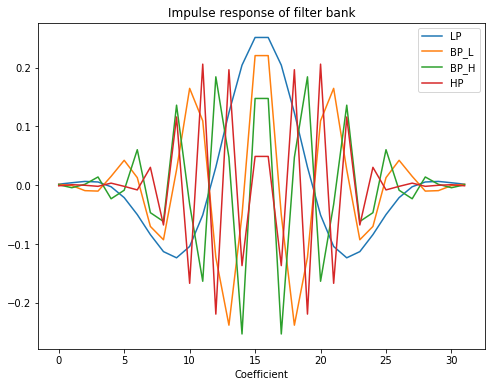

In [5]:
f1 = plt.figure()
for h in filterbank:
    plt.plot(h)
plt.legend(['LP','BP_L','BP_H','HP'])
plt.title('Impulse response of filter bank')
plt.xlabel('Coefficient')
plt.show()

Plot filter frequency responses:

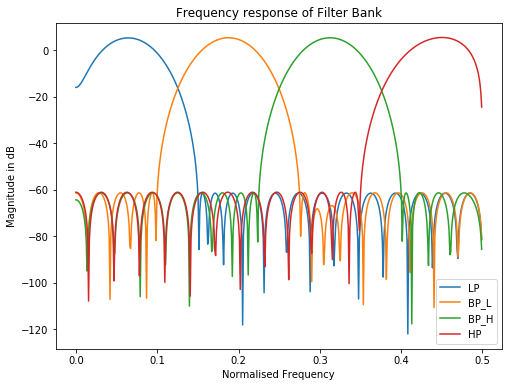

In [6]:
for h in filterbank:
    w,H = sig.freqz(h)
    # plot magnitude
    plt.plot(w/(np.pi*2),20*np.log10(np.abs(H)))
plt.legend(['LP','BP_L','BP_H','HP'])
plt.title('Frequency response of Filter Bank')
plt.xlabel('Normalised Frequency')
plt.ylabel('Magnitude in dB')
plt.show()

### Design filters using windowing

Definitions of window functions:

In [25]:
def raisedCosineWinow(N):
    n = np.arange(0,N)
    if (N%2 == 0): # even
        c = 0.5-0.5*np.cos(2*np.pi/N*(n+0.5))
    else: # odd
        c = 0.5-0.5*np.cos(2*np.pi/(N+1)*(n+1))    
    return c

def sinWindow(N):
    n = np.arange(0,N)
    if (N%2 == 0): # even
        s = np.sin(np.pi/N*(n+0.5))
    else:
        s = np.sin(np.pi/(N+1)*(n+1))
    return s

Definition of ideal impulse response (sinc):

In [86]:
def sincImpulse(N,wc):
    n = np.arange(0,N)
    delay = (N-1)/2.0
    h = (np.sin(wc*np.pi*(n-delay))/(np.pi*(n-delay)))
    return h

def modulator(N,w0):
    n = np.arange(0,N)
    delay = (N-1)/2.0
    m = 1/np.pi*np.cos(w2*np.pi*n-delay)
    return m

In [92]:
nFilterTabs = 64
wCos = raisedCosineWinow(nFilterTabs)
wSin = sinWindow(nFilterTabs)
hIdeal = sincImpulse(nFilterTabs,0.5)

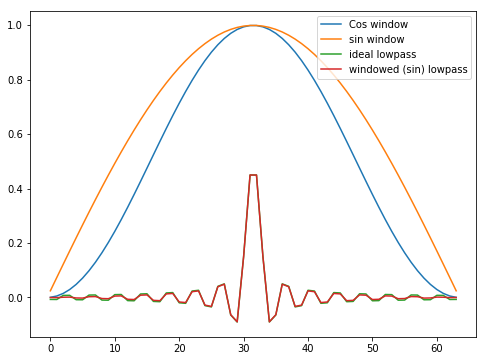

In [93]:
plt.plot(wCos)
plt.plot(wSin)
plt.plot(hIdeal)
plt.plot(wSin*hIdeal)
plt.legend(['Cos window', 'sin window', 'ideal lowpass', 'windowed (sin) lowpass'])
plt.show()

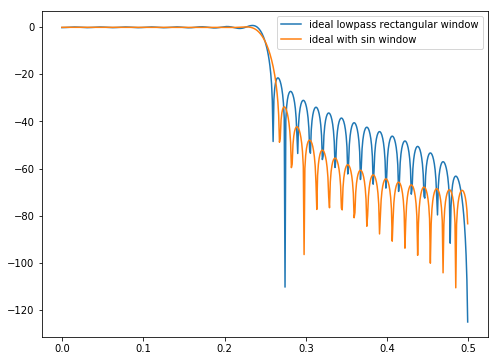

In [94]:
w1,h1 = sig.freqz(hIdeal)
w,h = sig.freqz(hIdeal*wSin)
plt.plot(w1/(2*np.pi),20*np.log10(np.abs(h1)))
plt.plot(w/(2*np.pi),20*np.log10(np.abs(h)))
plt.legend(['ideal lowpass rectangular window', 'ideal with sin window'])
plt.show()

Highpass and bandpass filters by modulation:

In [95]:
w2 = 1
m = modulator(nFilterTabs,w2)

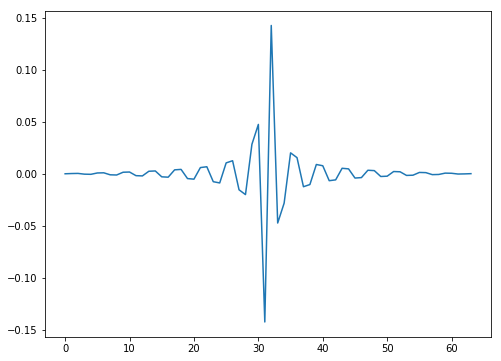

In [96]:
plt.plot(m*hIdeal*wSin)

/home/jole/programs/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


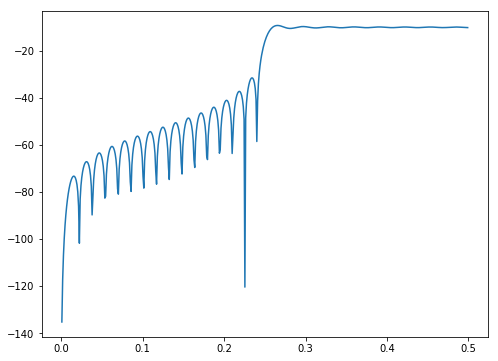

In [97]:
w,h = sig.freqz(m*hIdeal)
plt.plot(w/(2*np.pi),20*np.log10(np.abs(h)))
plt.show()